In [1]:
# import pandas as pd
# data = pd.read_csv('/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data.csv')
# data.head()

# ENSEMBLE

In [2]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

# create the dataframe from a query
ensembl_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx)
print ('Total number of fungi species in ensembl database: ',ensembl_species.size)
ensembl_species.head()

Total number of fungi species in ensembl database:  776


,TAXID
0,4829
1,245562
2,766039
3,857340
4,597362


ensemble species with only chromosomes: 150
ensemble species with only contigs: 618
species that contain both chromosomes and contigs: 43


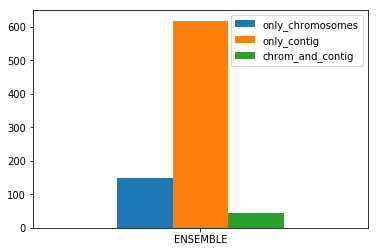

In [3]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv

# Create the connection
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ensembl_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ensembl_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND chromosome_count > 0 AND contig_count > 0", cnx).size


ensemble_dict = {"only_chromosomes": ensembl_chr, "only_contig": ensembl_contig, "chrom_and_contig": chrom_and_contig}
index = {"ENSEMBLE"}
df = pd.DataFrame(ensemble_dict, index=index)
ax = df.plot.bar(rot=0)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("ensemble species with only chromosomes:", ensembl_chr)
print("ensemble species with only contigs:", ensembl_contig )
print("species that contain both chromosomes and contigs:", chrom_and_contig)



# NCBI

NCBI species with only chromosomes: 65
NCBI species with only contigs: 193
NCBI that contain both chromosomes and contigs: 10


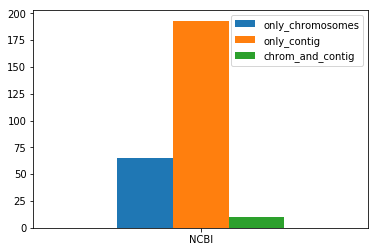

In [4]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ncbi_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count == 0", cnx).size
ncbi_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND chromosome_count > 0 AND contig_count > 0", cnx).size


ncbi_dict = {"only_chromosomes": ncbi_chr, "only_contig": ncbi_contig, "chrom_and_contig": chrom_and_contig}
index = {"NCBI"}
df = pd.DataFrame(ncbi_dict, index=index)
ax = df.plot.bar(rot=0)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("NCBI species with only chromosomes:", ncbi_chr)
print("NCBI species with only contigs:", ncbi_contig )
print("NCBI that contain both chromosomes and contigs:", chrom_and_contig)

# 1k

1k species with only chromosomes: 15
1k species with only contigs: 978
1k that contain both chromosomes and contigs: 4


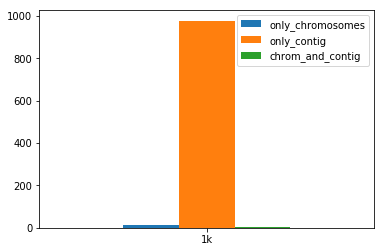

In [5]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

onek_chr = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count == 0", cnx).size
onek_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count == 0 AND contig_count >0", cnx).size
chrom_and_contig = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND chromosome_count > 0 AND contig_count > 0", cnx).size


onek_dict = {"only_chromosomes": onek_chr, "only_contig": onek_contig, "chrom_and_contig": chrom_and_contig}
index = {"1k"}
df = pd.DataFrame(onek_dict, index=index)
ax = df.plot.bar(rot=0)

# with open('ensemble_dict.csv', 'w') as csv_file:
#     writer = csv.writer(csv_file)
#     for key, value in ensemble_dict.items():
#        writer.writerow([key, value])
# df = pd.read_csv('ensemble_dict.csv')

print("1k species with only chromosomes:", onek_chr)
print("1k species with only contigs:", onek_contig )
print("1k that contain both chromosomes and contigs:", chrom_and_contig)

# Combined DNA Type Breakdown (ENSEMBL, 1K, NCBI)

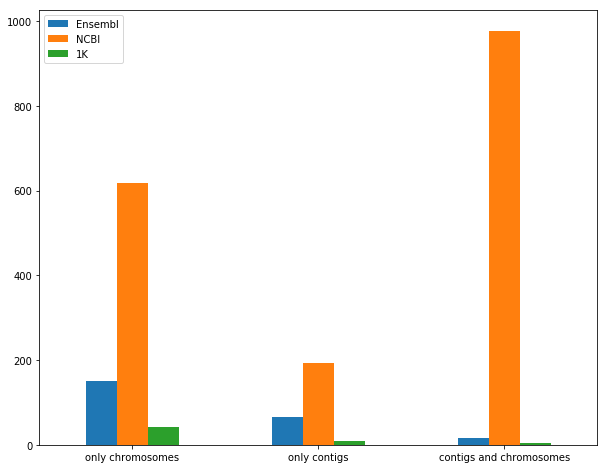

In [6]:
only_chr = [150, 65, 15]
only_contig = [618, 193, 978]
contig_and_chr = [43,10,4]
index = ['only chromosomes', 'only contigs', 'contigs and chromosomes']
df = pd.DataFrame({'Ensembl': only_chr,'NCBI': only_contig, '1K': contig_and_chr}, index=index)
ax = df.plot.bar(rot=0, figsize=(10, 8))




# PIE CHART  COMPOSITION: Species count and Genus

SpeciesCount
776
274
1018
GenusCount
271
160
612


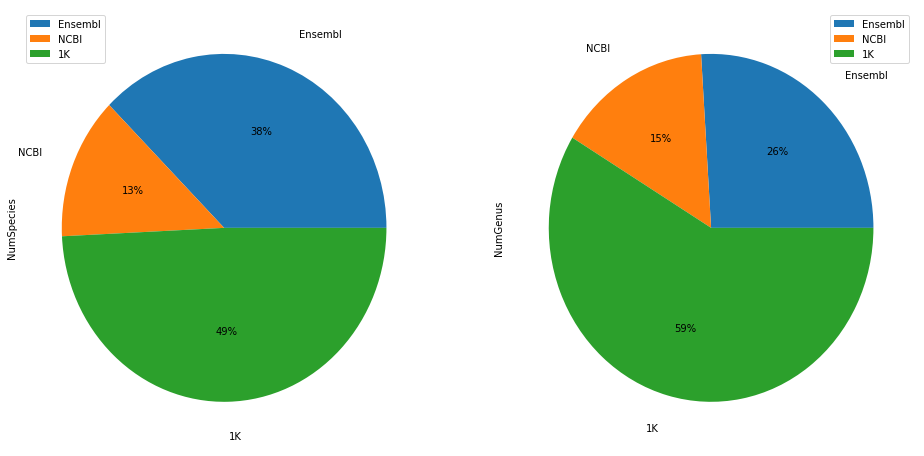

In [7]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ensembl_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_species = pd.read_sql_query("SELECT DISTINCT TAXID FROM speciesdb where dbname = '1K'", cnx).size

print("SpeciesCount")

print(ensembl_species)
print(NCBI_species)
print(OneK_species)

ensembl_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = 'ENSEMBLE'", cnx).size
NCBI_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = 'NCBI'", cnx).size
OneK_genus = pd.read_sql_query("SELECT DISTINCT GenusName FROM speciesdb where dbname = '1K'", cnx).size

print("GenusCount")
print(ensembl_genus)
print(NCBI_genus)
print(OneK_genus)


df = pd.DataFrame({'NumSpecies': [ensembl_species, NCBI_species , OneK_species],'NumGenus': [ensembl_genus, NCBI_genus,OneK_genus]},
                  index=['Ensembl', 'NCBI', '1K'])
# plot = df.plot.pie(y='NumSpecies', figsize=(8, 8))
# plot = df.plot.pie(subplots=True, figsize=(16, 8))

plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.2, fontsize=10, subplots=True, figsize=(16, 8))



# Number of species that have Mitochondrial DNA in each database

In [8]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

ensembl_mt = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'ENSEMBLE' AND mtDNA_count > 0", cnx).size
NCBI_mt = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = 'NCBI' AND mtDNA_count > 0", cnx).size
OneK_mt = pd.read_sql_query("SELECT TAXID FROM speciesdb where dbname = '1K' AND mtDNA_count > 0", cnx).size

print(ensembl_mt)
print(NCBI_mt)
print(OneK_mt)


158
47
0


# Species contained in three, two and one database

258
38
53
1292
349
26
157
681
454


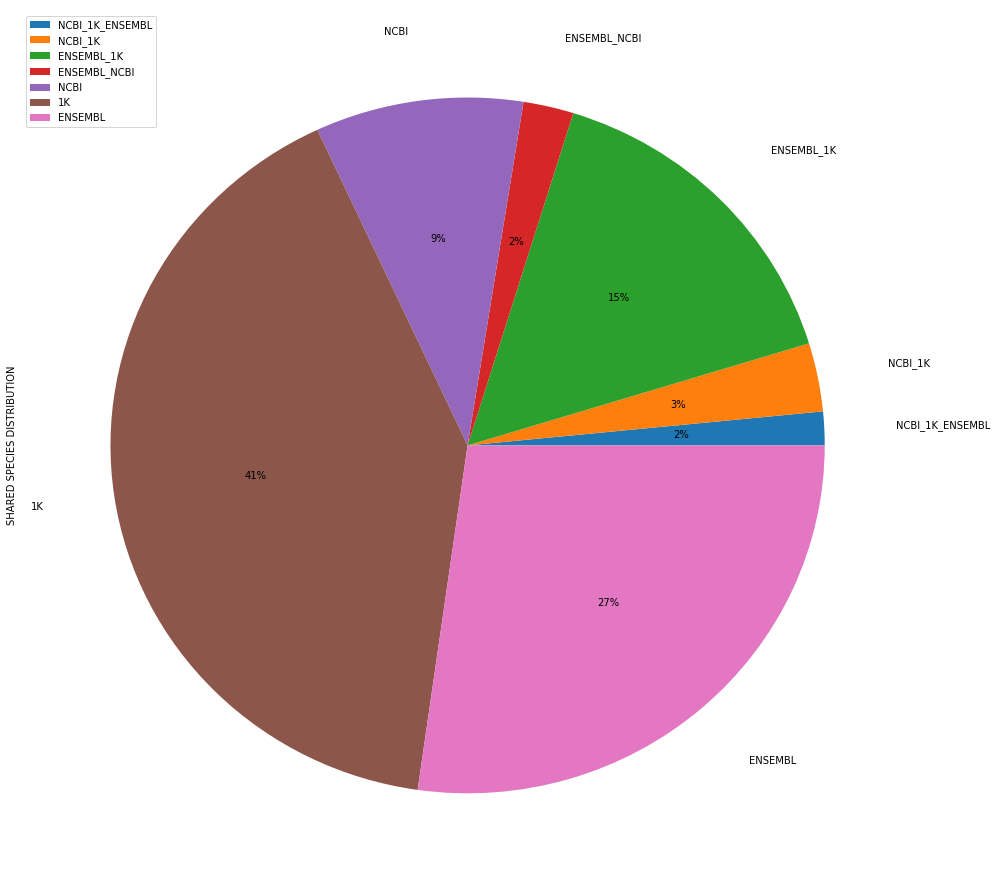

In [9]:
import pandas as pd
import seaborn as sns
import sqlite3
import csv
cnx = sqlite3.connect(r'/Users/aaronkarlsberg/Desktop/199/db.microbiome/Fungi/data/refSeqFungiStats.db')

occur_once = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1", cnx)

occur_twice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 2", cnx)

occur_thrice = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 3", cnx)

ENSEMBLE_NCBI = 0
ENSEMBLE_1K = 0
NCBI_1K = 0

for index, row in occur_twice.iterrows():
    taxid = row["TAXID"]
    databases = pd.read_sql_query(f"SELECT DBNAME FROM SPECIESDB WHERE TAXID = {taxid}", cnx)
    ENSEMBLE = 0
    NCBI = 0
    ONEK = 0
    for i, r in databases.iterrows():
        if r["DBNAME"] == "ENSEMBLE":
            ENSEMBLE = 1
        if r["DBNAME"] == "NCBI":
            NCBI = 1
        if r["DBNAME"] == "1K":
            ONEK = 1
    if ENSEMBLE == 1 and ONEK == 1:  
        ENSEMBLE_1K += 1
    if ENSEMBLE == 1 and NCBI == 1:  
        ENSEMBLE_NCBI += 1
    if NCBI == 1 and ONEK == 1: 
        NCBI_1K += 1        

print(ENSEMBLE_1K)
print(ENSEMBLE_NCBI)
print(NCBI_1K)



print(occur_once.size)
print(occur_twice.size)
print(occur_thrice.size)


NCBI = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'NCBI'", cnx)

ONEK = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = '1K'", cnx)

ENSEMBL = pd.read_sql_query("SELECT TAXID FROM SPECIESDB Group by TAXID HAVING COUNT(DISTINCT DBNAME) = 1 AND DBNAME = 'ENSEMBLE'", cnx)

print(NCBI.size)
print(ONEK.size)
print(ENSEMBL.size)                        

df = pd.DataFrame({'SHARED SPECIES DISTRIBUTION': [occur_thrice.size, NCBI_1K, ENSEMBLE_1K, ENSEMBLE_NCBI, NCBI.size, ONEK.size, ENSEMBL.size]},
                  index=['NCBI_1K_ENSEMBL', 'NCBI_1K', 'ENSEMBL_1K', 'ENSEMBL_NCBI', 'NCBI', '1K', 'ENSEMBL'])
# plot = df.plot.pie(y='NumSpecies', figsize=(8, 8))
# plot = df.plot.pie(subplots=True, figsize=(16, 8))

plot = df.plot.pie(autopct='%1.0f%%', labeldistance=1.2, fontsize=10, subplots=True, figsize=(16, 16))





# Contain seperate strains